Detect and remove outliers before buliding Machine Learning model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('winequality.csv')

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
df.shape

(6497, 13)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
df.describe(include='object')

,type
count,6497
unique,2
top,white
freq,4898


In [15]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

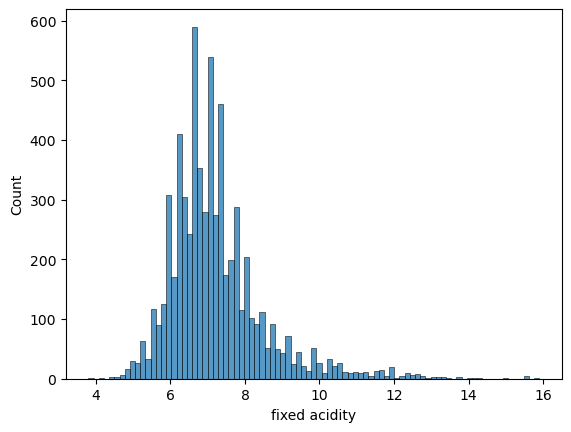

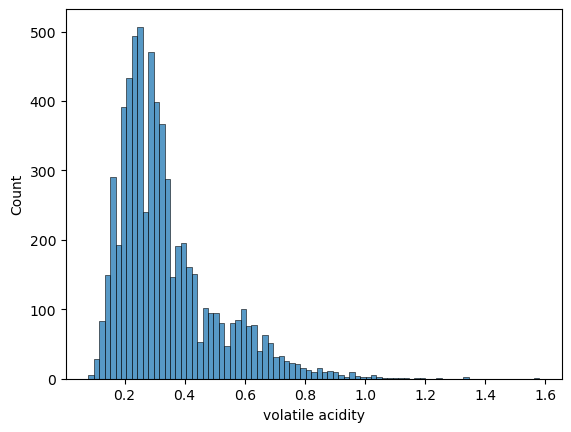

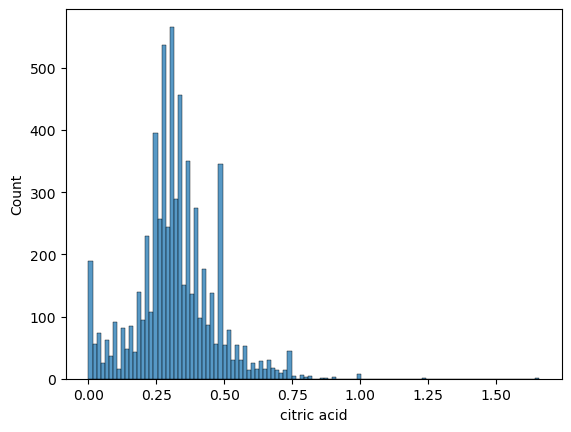

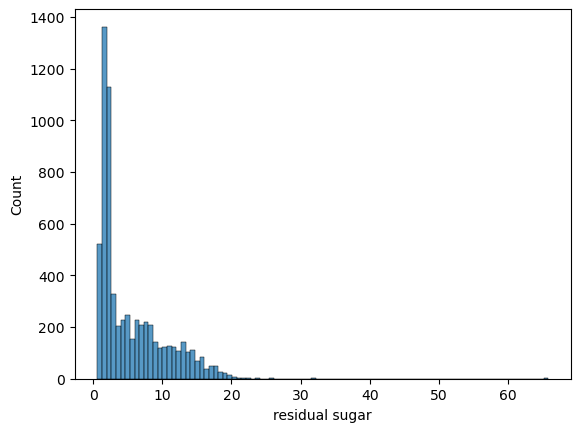

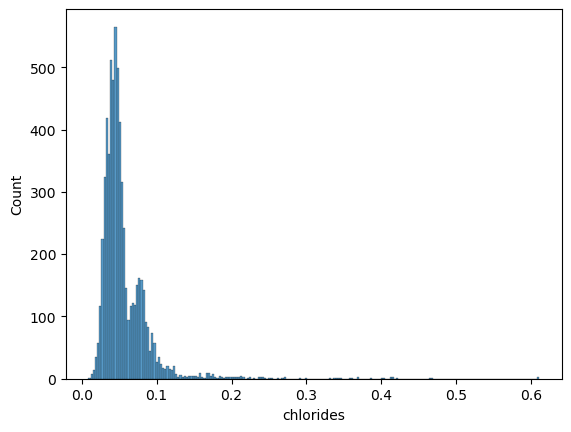

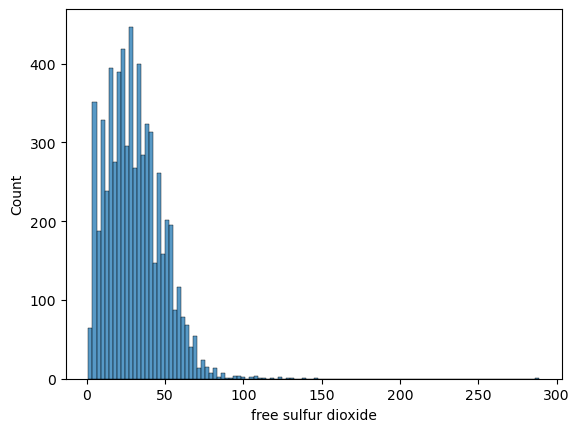

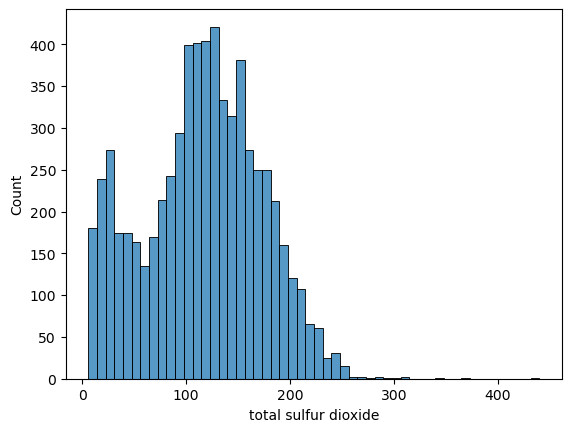

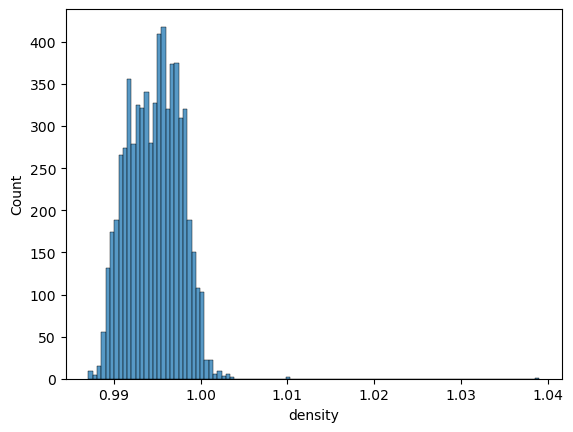

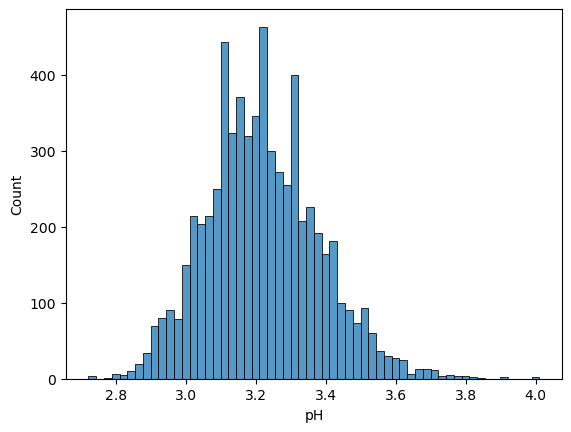

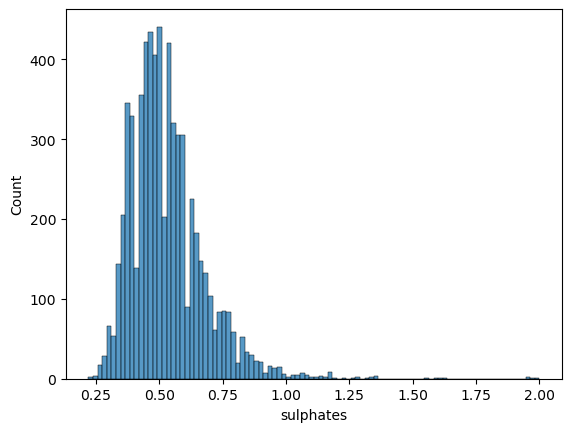

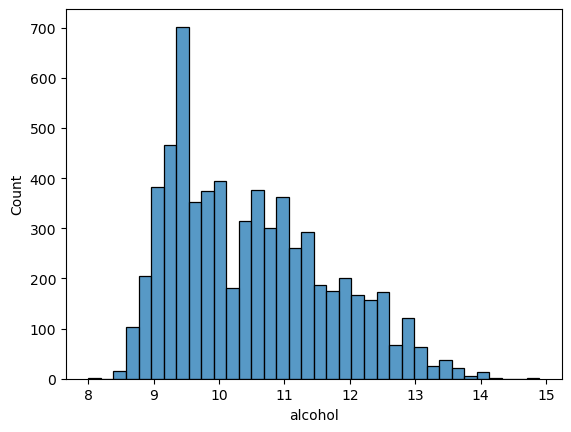

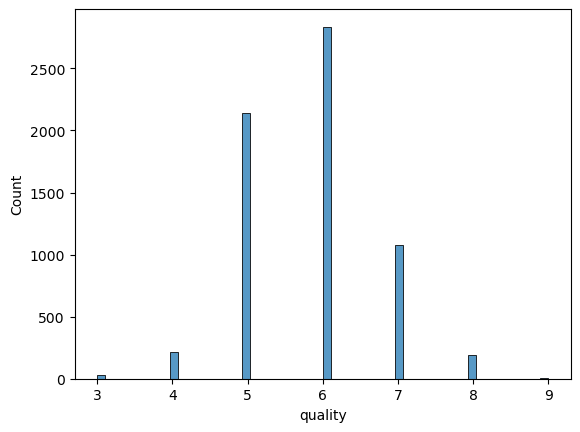

In [17]:
import warnings
warnings.filterwarnings('ignore')

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

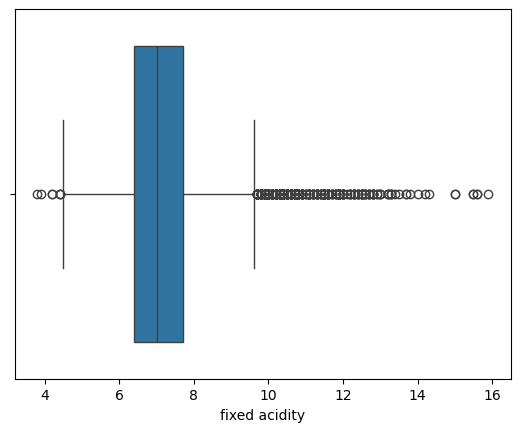

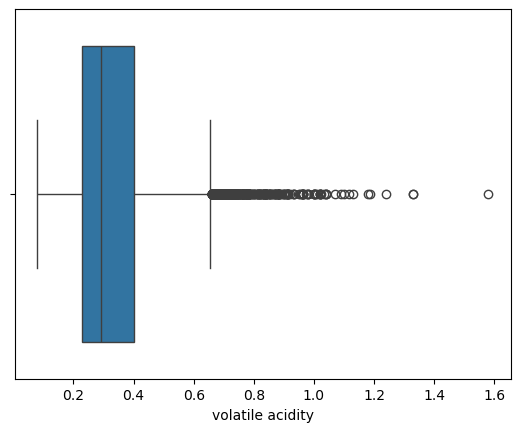

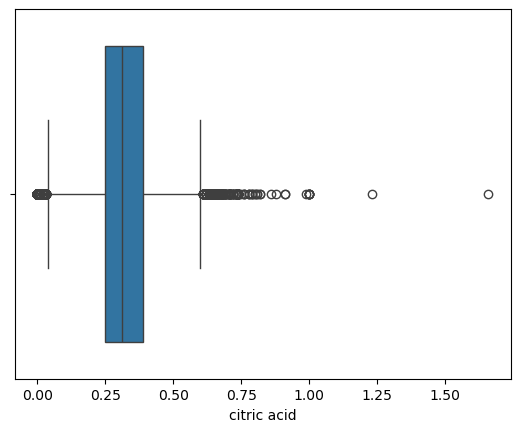

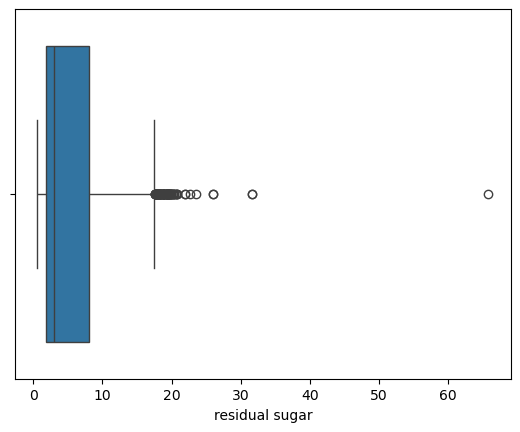

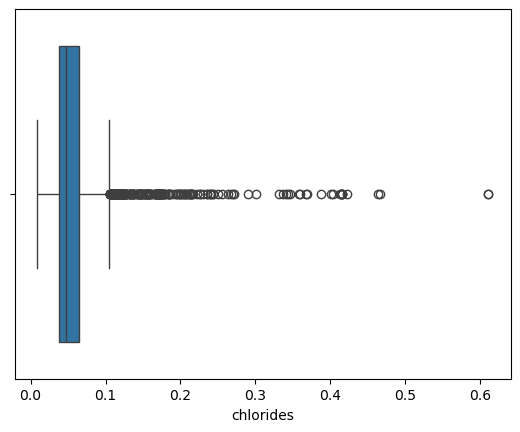

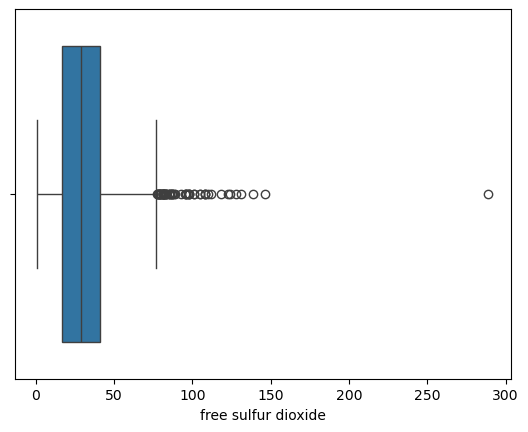

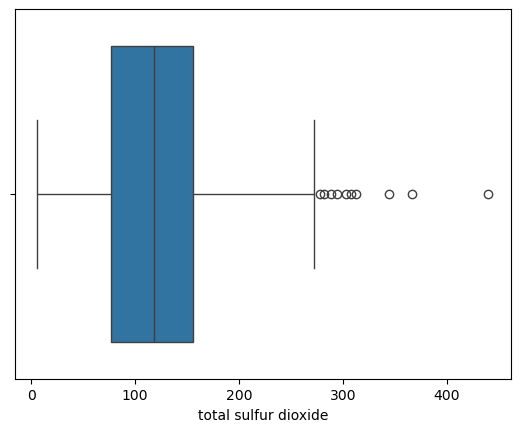

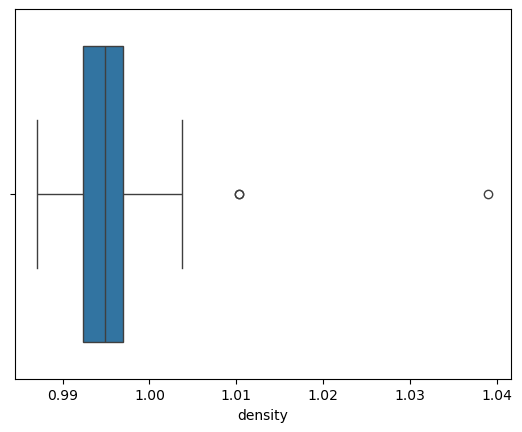

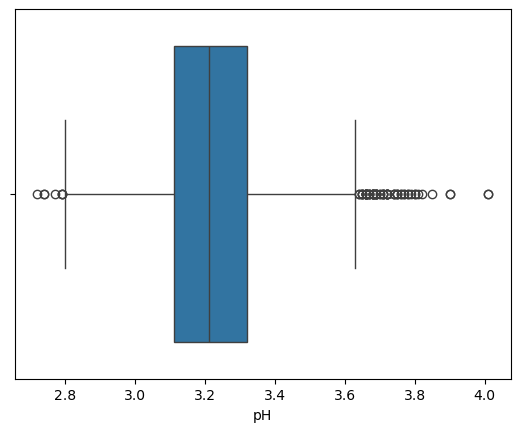

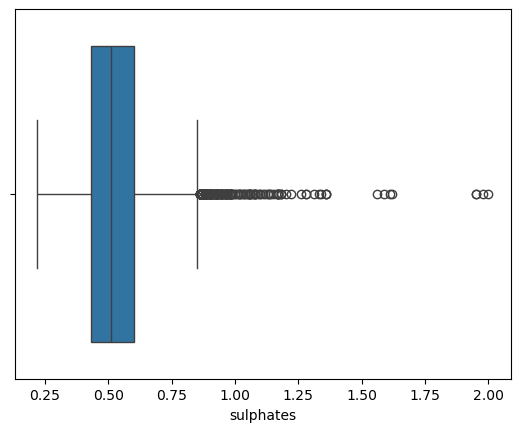

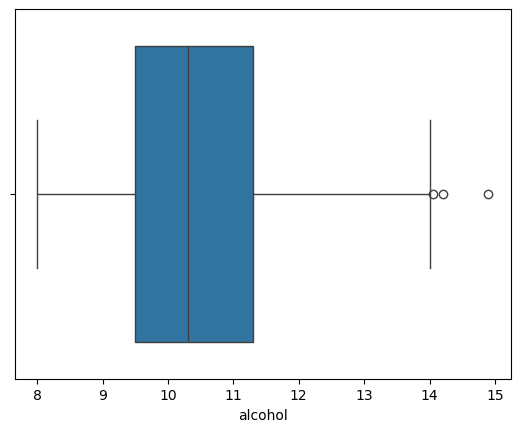

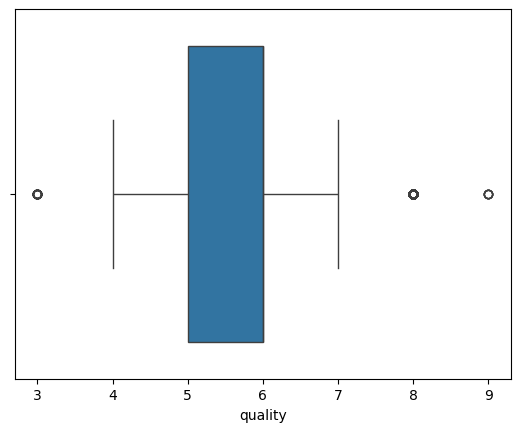

In [19]:
import warnings
warnings.filterwarnings('ignore')

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

<Axes: xlabel='residual sugar', ylabel='Density'>

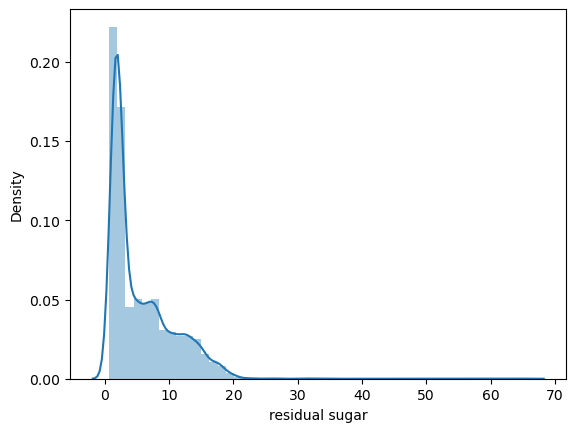

In [21]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['residual sugar'])

<Axes: ylabel='residual sugar'>

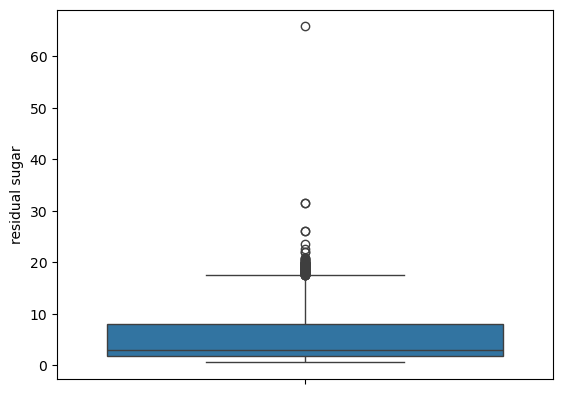

In [23]:
sns.boxplot(df['residual sugar'])

In [25]:
### Z-Score
##find the limit
upper_limit=df['residual sugar'].mean()+3*df['residual sugar'].std()
lower_limit=df['residual sugar'].mean()-3*df['residual sugar'].std()
print('upper_limit:',upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 19.718700632944987
lower_limit: -8.830047823091254


In [27]:
##find the outlier

df.loc[(df['residual sugar']>upper_limit) | (df['residual sugar']<lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
292,white,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5
444,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
1454,white,8.3,0.210,0.49,19.80,0.054,50.0,231.0,1.00120,2.99,0.54,9.2,5
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


In [29]:
##triming(remoiving/deleting) the outlier

new_df= df.loc[(df['residual sugar']<upper_limit) & (df['residual sugar']>lower_limit)]
print('old_data: ',len(df))
print('new_data: ',len(new_df))
print('outliers: ',len(df)-len(new_df))

old_data:  6497
new_data:  6469
outliers:  28


<Axes: ylabel='residual sugar'>

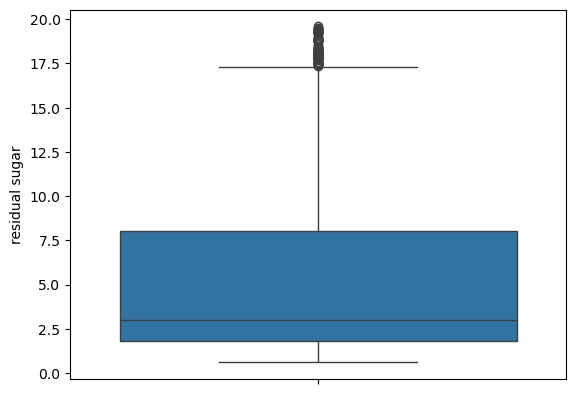

In [31]:
sns.boxplot(new_df['residual sugar'])

In [33]:
##capping(replacing) - change/replace the outlier value with upper or lower limit value

new_df=df.copy()
new_df.loc[new_df['residual sugar']>upper_limit,'residual sugar']=upper_limit
new_df.loc[new_df['residual sugar']<lower_limit,'residual sugar']=lower_limit

<Axes: ylabel='residual sugar'>

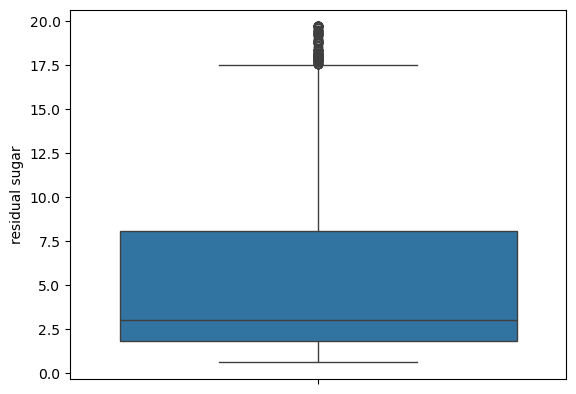

In [35]:
sns.boxplot(new_df['residual sugar'])

In [39]:
len(new_df)

6497

IQR method

In [57]:
q1=df['residual sugar'].quantile(0.25)
q3=df['residual sugar'].quantile(0.75)
iqr= q3-q1

In [59]:
q1, q3, iqr

(1.8, 8.1, 6.3)

In [63]:
##finding upper and lower limit
upper_limit=q3+ (1.5 * iqr)
lower_limit=q1- (1.5 * iqr)
upper_limit , lower_limit

(17.549999999999997, -7.6499999999999995)

<Axes: ylabel='residual sugar'>

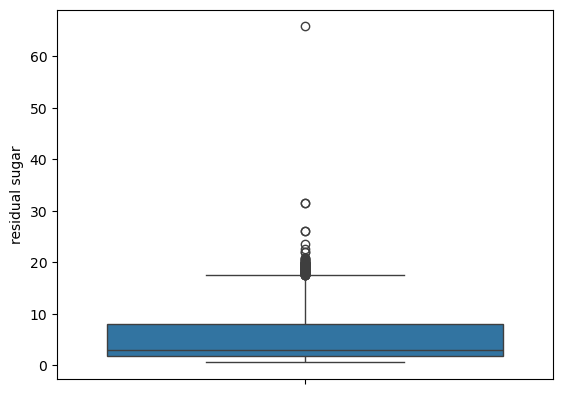

In [67]:
sns.boxplot(df['residual sugar'])

In [69]:
##find the outlier

df.loc[(df['residual sugar']>upper_limit) | (df['residual sugar']<lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,white,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [71]:
##triming(remoiving/deleting) the outlier

new_df= df.loc[(df['residual sugar']<upper_limit) & (df['residual sugar']>lower_limit)]
print('old_data: ',len(df))
print('new_data: ',len(new_df))
print('outliers: ',len(df)-len(new_df))

old_data:  6497
new_data:  6377
outliers:  120


<Axes: ylabel='residual sugar'>

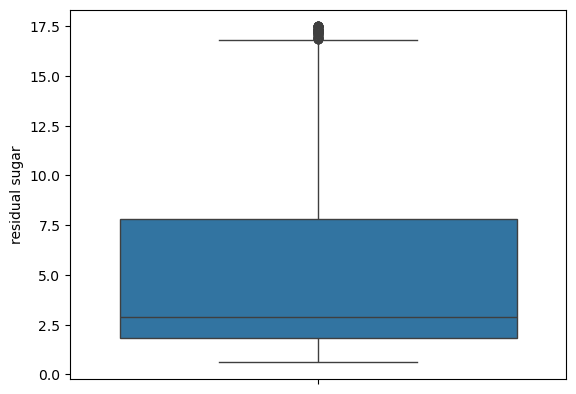

In [73]:
sns.boxplot(new_df['residual sugar'])

In [75]:
##capping(replacing) - change/replace the outlier value with upper or lower limit value

new_df=df.copy()
new_df.loc[new_df['residual sugar']>upper_limit,'residual sugar']=upper_limit
new_df.loc[new_df['residual sugar']<lower_limit,'residual sugar']=lower_limit

<Axes: ylabel='residual sugar'>

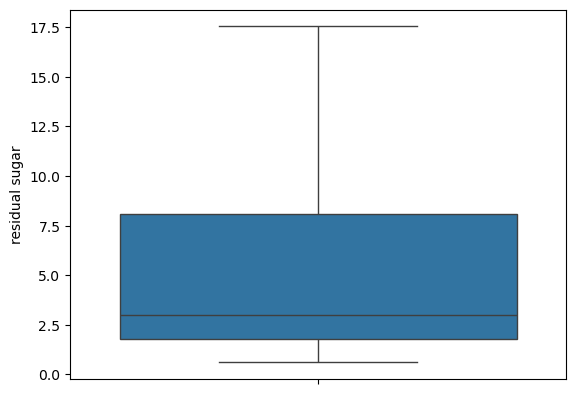

In [77]:
sns.boxplot(new_df['residual sugar'])

Percentile Method

In [81]:
upper_limit=df['residual sugar'].quantile(0.99)
lower_limit=df['residual sugar'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 18.2
lower_limit: 0.9


<Axes: ylabel='residual sugar'>

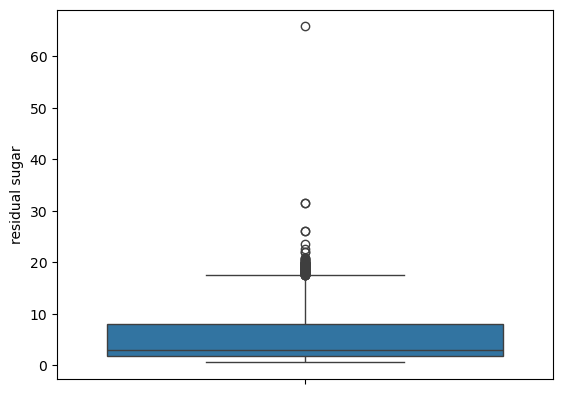

In [83]:
sns.boxplot(df['residual sugar'])

In [85]:
##find the outlier

df.loc[(df['residual sugar']>upper_limit) | (df['residual sugar']<lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
103,white,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5
111,white,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6
4778,white,5.8,0.315,0.19,19.40,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,6
4779,white,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.90,4
4877,white,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5


In [87]:
##triming(remoiving/deleting) the outlier

new_df= df.loc[(df['residual sugar']<=upper_limit) & (df['residual sugar']>=lower_limit)]
print('old_data: ',len(df))
print('new_data: ',len(new_df))
print('outliers: ',len(df)-len(new_df))

old_data:  6497
new_data:  6398
outliers:  99


<Axes: ylabel='residual sugar'>

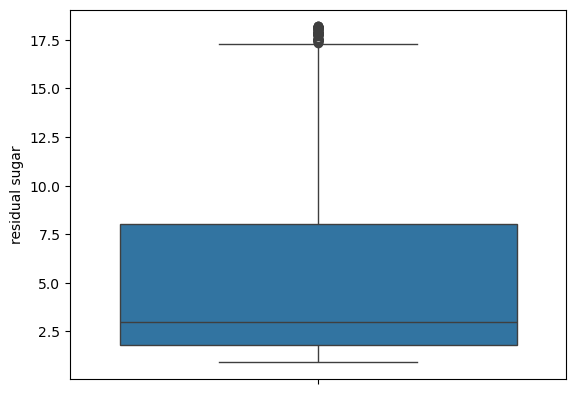

In [91]:
sns.boxplot(new_df['residual sugar'])

In [93]:
##capping(replacing) - change/replace the outlier value with upper or lower limit value

new_df=df.copy()
new_df.loc[new_df['residual sugar']>upper_limit,'residual sugar']=upper_limit
new_df.loc[new_df['residual sugar']<lower_limit,'residual sugar']=lower_limit

<Axes: ylabel='residual sugar'>

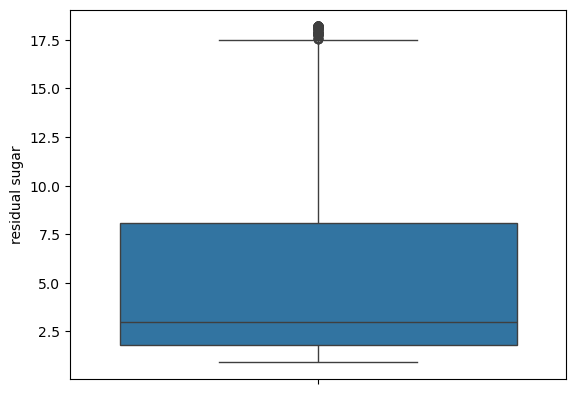

In [95]:
sns.boxplot(new_df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

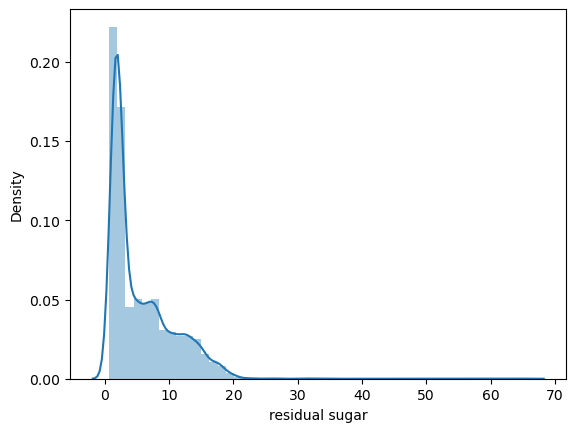

In [99]:
sns.distplot(df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

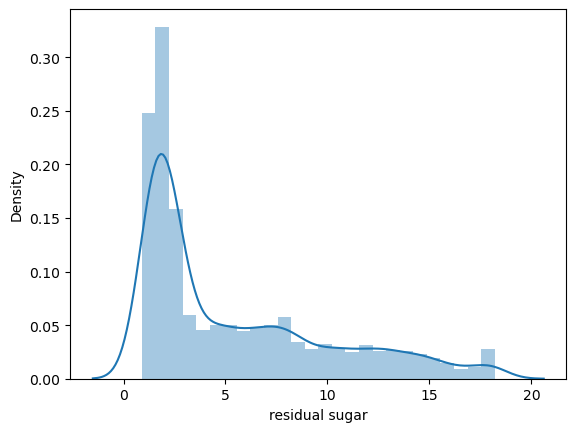

In [101]:
sns.distplot(new_df['residual sugar'])